In [1]:
# importing all the necessary librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('Skyserver.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.shape

(10000, 18)

The dataset has 10000 rows and 18 rows

In [4]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

class column is of the datatype object

objid, ra, dec, u, g, r, i, z, specobjid, redshift are of the datatype float64

run, rerun, camcol, field, plate, mjd, fiberid are of the datatype int64

In [5]:
# Checking for missing values
df.isnull().values.any()

False

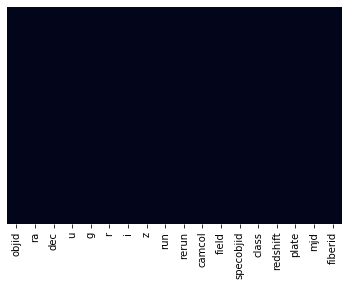

In [6]:
# Checking the values via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

There are no null values in the daatset

In [7]:
# Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [8]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

## Changing the target column to numeric type

In [9]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [10]:
df['class']=df['class'].map({'STAR':0, 'GALAXY': 1, 'QSO':2})
df['class'].dtypes

dtype('int64')

In [11]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,0,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,0,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,1,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,0,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,1,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,1,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,0,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,1,0.014019,447,51877,229


# Summary Statistics

In [12]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.669800,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.625465,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,1.000000,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


In [13]:
df['objid'].unique()

array([1.23765e+18])

onjid over the entire dataset is the same, therefore the column can be dropped

In [14]:
df['rerun'].unique()

array([301], dtype=int64)

rerun value over the entire dataset is the same, therefore the column can be dropped

In [15]:
df['specobjid'].value_counts()

2.881270e+18    18
2.881220e+18    18
3.722230e+18    18
3.222410e+18    17
2.880120e+18    17
                ..
3.885350e+17     1
4.841730e+17     1
4.988460e+17     1
4.315780e+18     1
3.716180e+17     1
Name: specobjid, Length: 6349, dtype: int64

In [16]:
df['fiberid'].value_counts()

155    29
138    28
454    27
249    26
11     26
       ..
866     1
858     1
850     1
842     1
915     1
Name: fiberid, Length: 892, dtype: int64

## Correlation

In [17]:
df_corr = df.corr()
df_corr

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,1.442555e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,4.118918e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,9.124866e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,2.845415e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,3.573522e-01,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,2.786783e-01,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,2.053670e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,1.494443e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,1.006273e-01,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


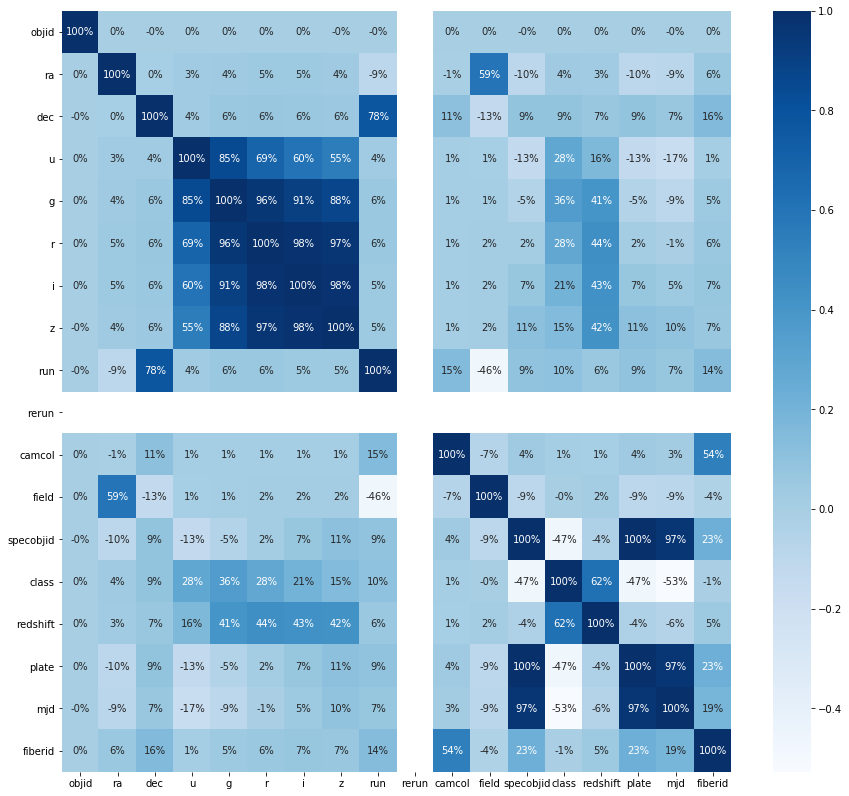

In [18]:
plt.figure(figsize=(15,14))
sns.heatmap(df_corr,annot=True,fmt='.0%',cmap='Blues')
plt.show()

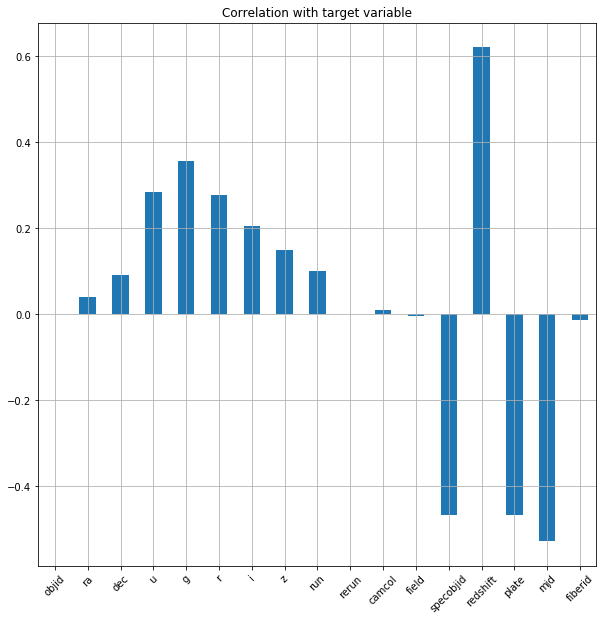

In [19]:
# Correlation with target variable (i.e. class)
plt.figure(figsize=(10,10))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=45)
plt.title('Correlation with target variable')
plt.show()

# Dropping columns

In [20]:
df = df.drop(columns=['objid','rerun','specobjid'])
df.shape

(10000, 15)

In [21]:
df

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,0,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,0,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,1,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,0,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,0,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,1,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,1,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,0,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,1,0.014019,447,51877,229


# Data Visualization

## Univariate Analysis

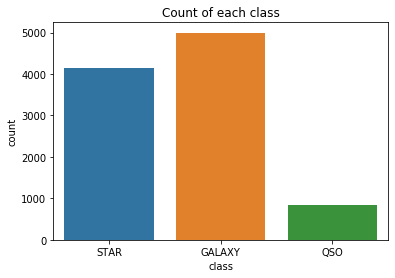

1    4998
0    4152
2     850
Name: class, dtype: int64


In [22]:
# Checking for count of class 
plt.subplots(figsize=(6,4))
sns.countplot(x='class',data=df)
plt.title('Count of each class')
plt.xticks([0,1,2],['STAR','GALAXY','QSO'])
plt.show()

print(df['class'].value_counts())

Galaxy is the highest with a count of 4998

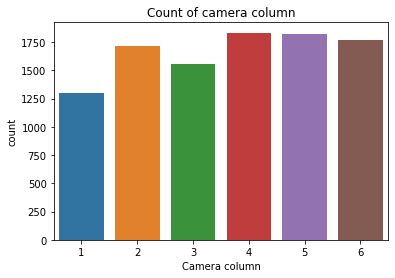

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64


In [23]:
# Checking for count of class 
plt.subplots(figsize=(6,4))
sns.countplot(x='camcol',data=df)
plt.title('Count of camera column')
plt.xlabel('Camera column')
plt.show()

print(df['camcol'].value_counts())

Camer column 4 has the highest count of 1834, camera column 5 has a count of 1827

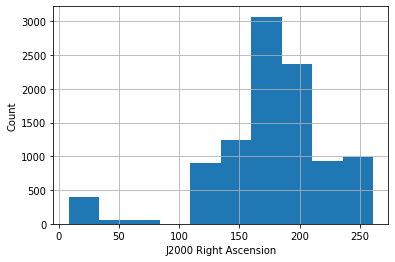

In [24]:
df['ra'].hist()
plt.xlabel('J2000 Right Ascension')
plt.ylabel('Count')
plt.show()

Count of ra in the range 160-180 is the highest

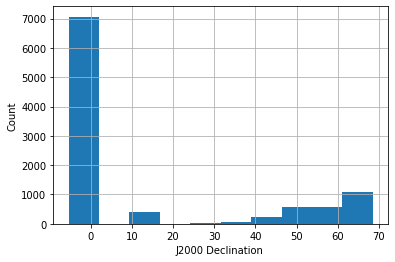

In [25]:
df['dec'].hist()
plt.xlabel('J2000 Declination ')
plt.ylabel('Count')
plt.show()

Count of dec in the range of -6-2 is the highest

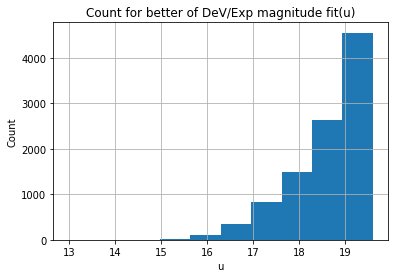

In [26]:
df['u'].hist()
plt.title('Count for better of DeV/Exp magnitude fit(u)')
plt.xlabel('u')
plt.ylabel('Count')
plt.show()

Count is highest in the range of 19-19.5

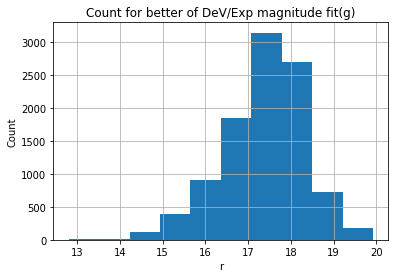

In [27]:
df['g'].hist()
plt.title('Count for better of DeV/Exp magnitude fit(g)')
plt.xlabel('r')
plt.ylabel('Count')
plt.show()

Count is highest in the range of 17-17.8

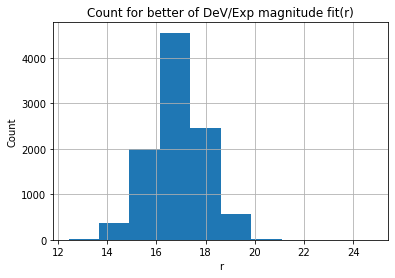

In [28]:
df['r'].hist()
plt.title('Count for better of DeV/Exp magnitude fit(r)')
plt.xlabel('r')
plt.ylabel('Count')
plt.show()

Count is highest in the range of 16.2-17.5

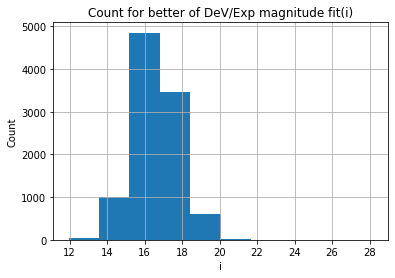

In [29]:
df['i'].hist()
plt.title('Count for better of DeV/Exp magnitude fit(i)')
plt.xlabel('i')
plt.ylabel('Count')
plt.show()

Count is highest in the range of 15-16.4

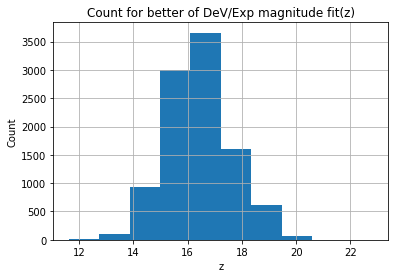

In [30]:
df['z'].hist()
plt.title('Count for better of DeV/Exp magnitude fit(z)')
plt.xlabel('z')
plt.ylabel('Count')
plt.show()

Count is highest in the range of 16-17

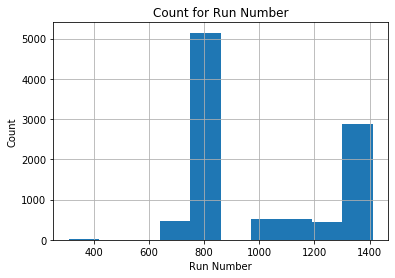

In [31]:
df['run'].hist()
plt.title('Count for Run Number')
plt.xlabel('Run Number')
plt.ylabel('Count')
plt.show()

Count is highest for run number in the range  of 750-850

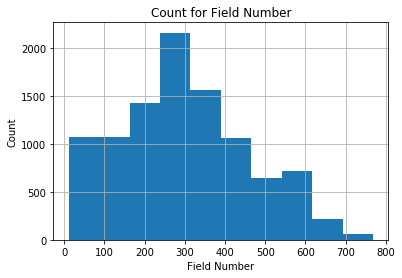

In [32]:
df['field'].hist()
plt.title('Count for Field Number')
plt.xlabel('Field Number')
plt.ylabel('Count')
plt.show()

Count is highest for field number in the range  of 250-300

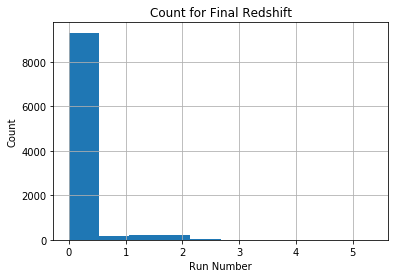

In [33]:
df['redshift'].hist()
plt.title('Count for Final Redshift')
plt.xlabel('Run Number')
plt.ylabel('Count')
plt.show()

Count is highest for Final Redshift in the range  of 0-0.5

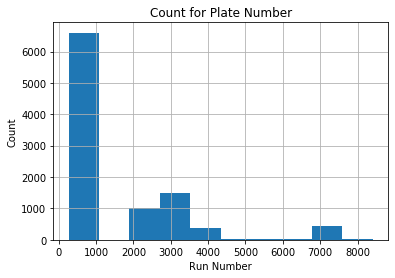

In [34]:
df['plate'].hist()
plt.title('Count for Plate Number')
plt.xlabel('Run Number')
plt.ylabel('Count')
plt.show()

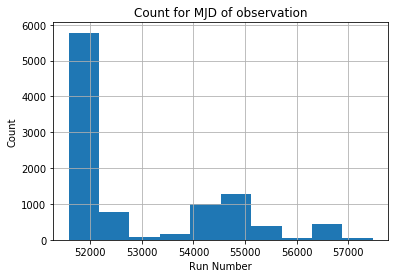

In [35]:
df['mjd'].hist()
plt.title('Count for MJD of observation')
plt.xlabel('Run Number')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis

<Figure size 576x288 with 0 Axes>

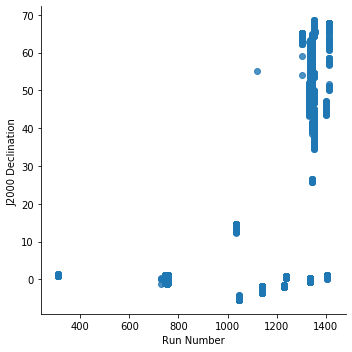

In [36]:
# Scatter plot between Run number and Declination
plt.figure(figsize=(8,4))
sns.lmplot(x='run',y='dec',fit_reg=False,data=df)
plt.xlabel('Run Number')
plt.ylabel('J2000 Declination ')
plt.show()

Declination is higher for higher run number

<Figure size 576x288 with 0 Axes>

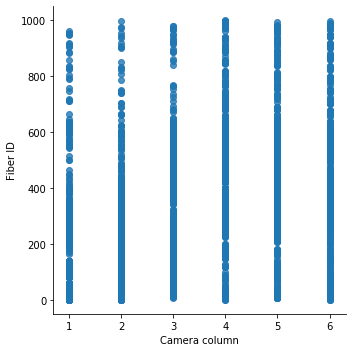

In [37]:
# Scatter plot between Camera column and Fiber ID
plt.figure(figsize=(8,4))
sns.lmplot(x='camcol',y='fiberid',fit_reg=False,data=df)
plt.xlabel('Camera column')
plt.ylabel('Fiber ID')
plt.show()

Fiber id is somewhat uniformly distributed over all camera columns

<Figure size 576x288 with 0 Axes>

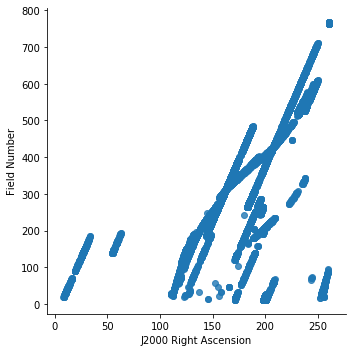

In [38]:
# Scatter plot between Field number and Right Ascension
plt.figure(figsize=(8,4))
sns.lmplot(x='ra',y='field',fit_reg=False,data=df)
plt.xlabel('J2000 Right Ascension')
plt.ylabel('Field Number')
plt.show()

Field number increases with increase in right ascension

<Figure size 576x288 with 0 Axes>

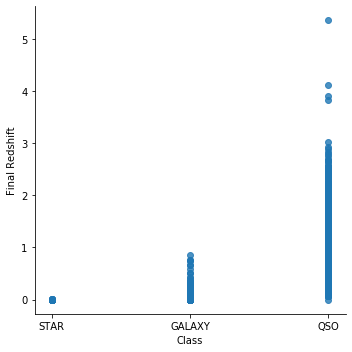

In [39]:
# Scatter plot between Final redshift and class
plt.figure(figsize=(8,4))
sns.lmplot(x='class',y='redshift',fit_reg=False,data=df)
plt.xlabel('Class')
plt.xticks([0,1,2],['STAR','GALAXY','QSO'])
plt.ylabel('Final Redshift')
plt.show()

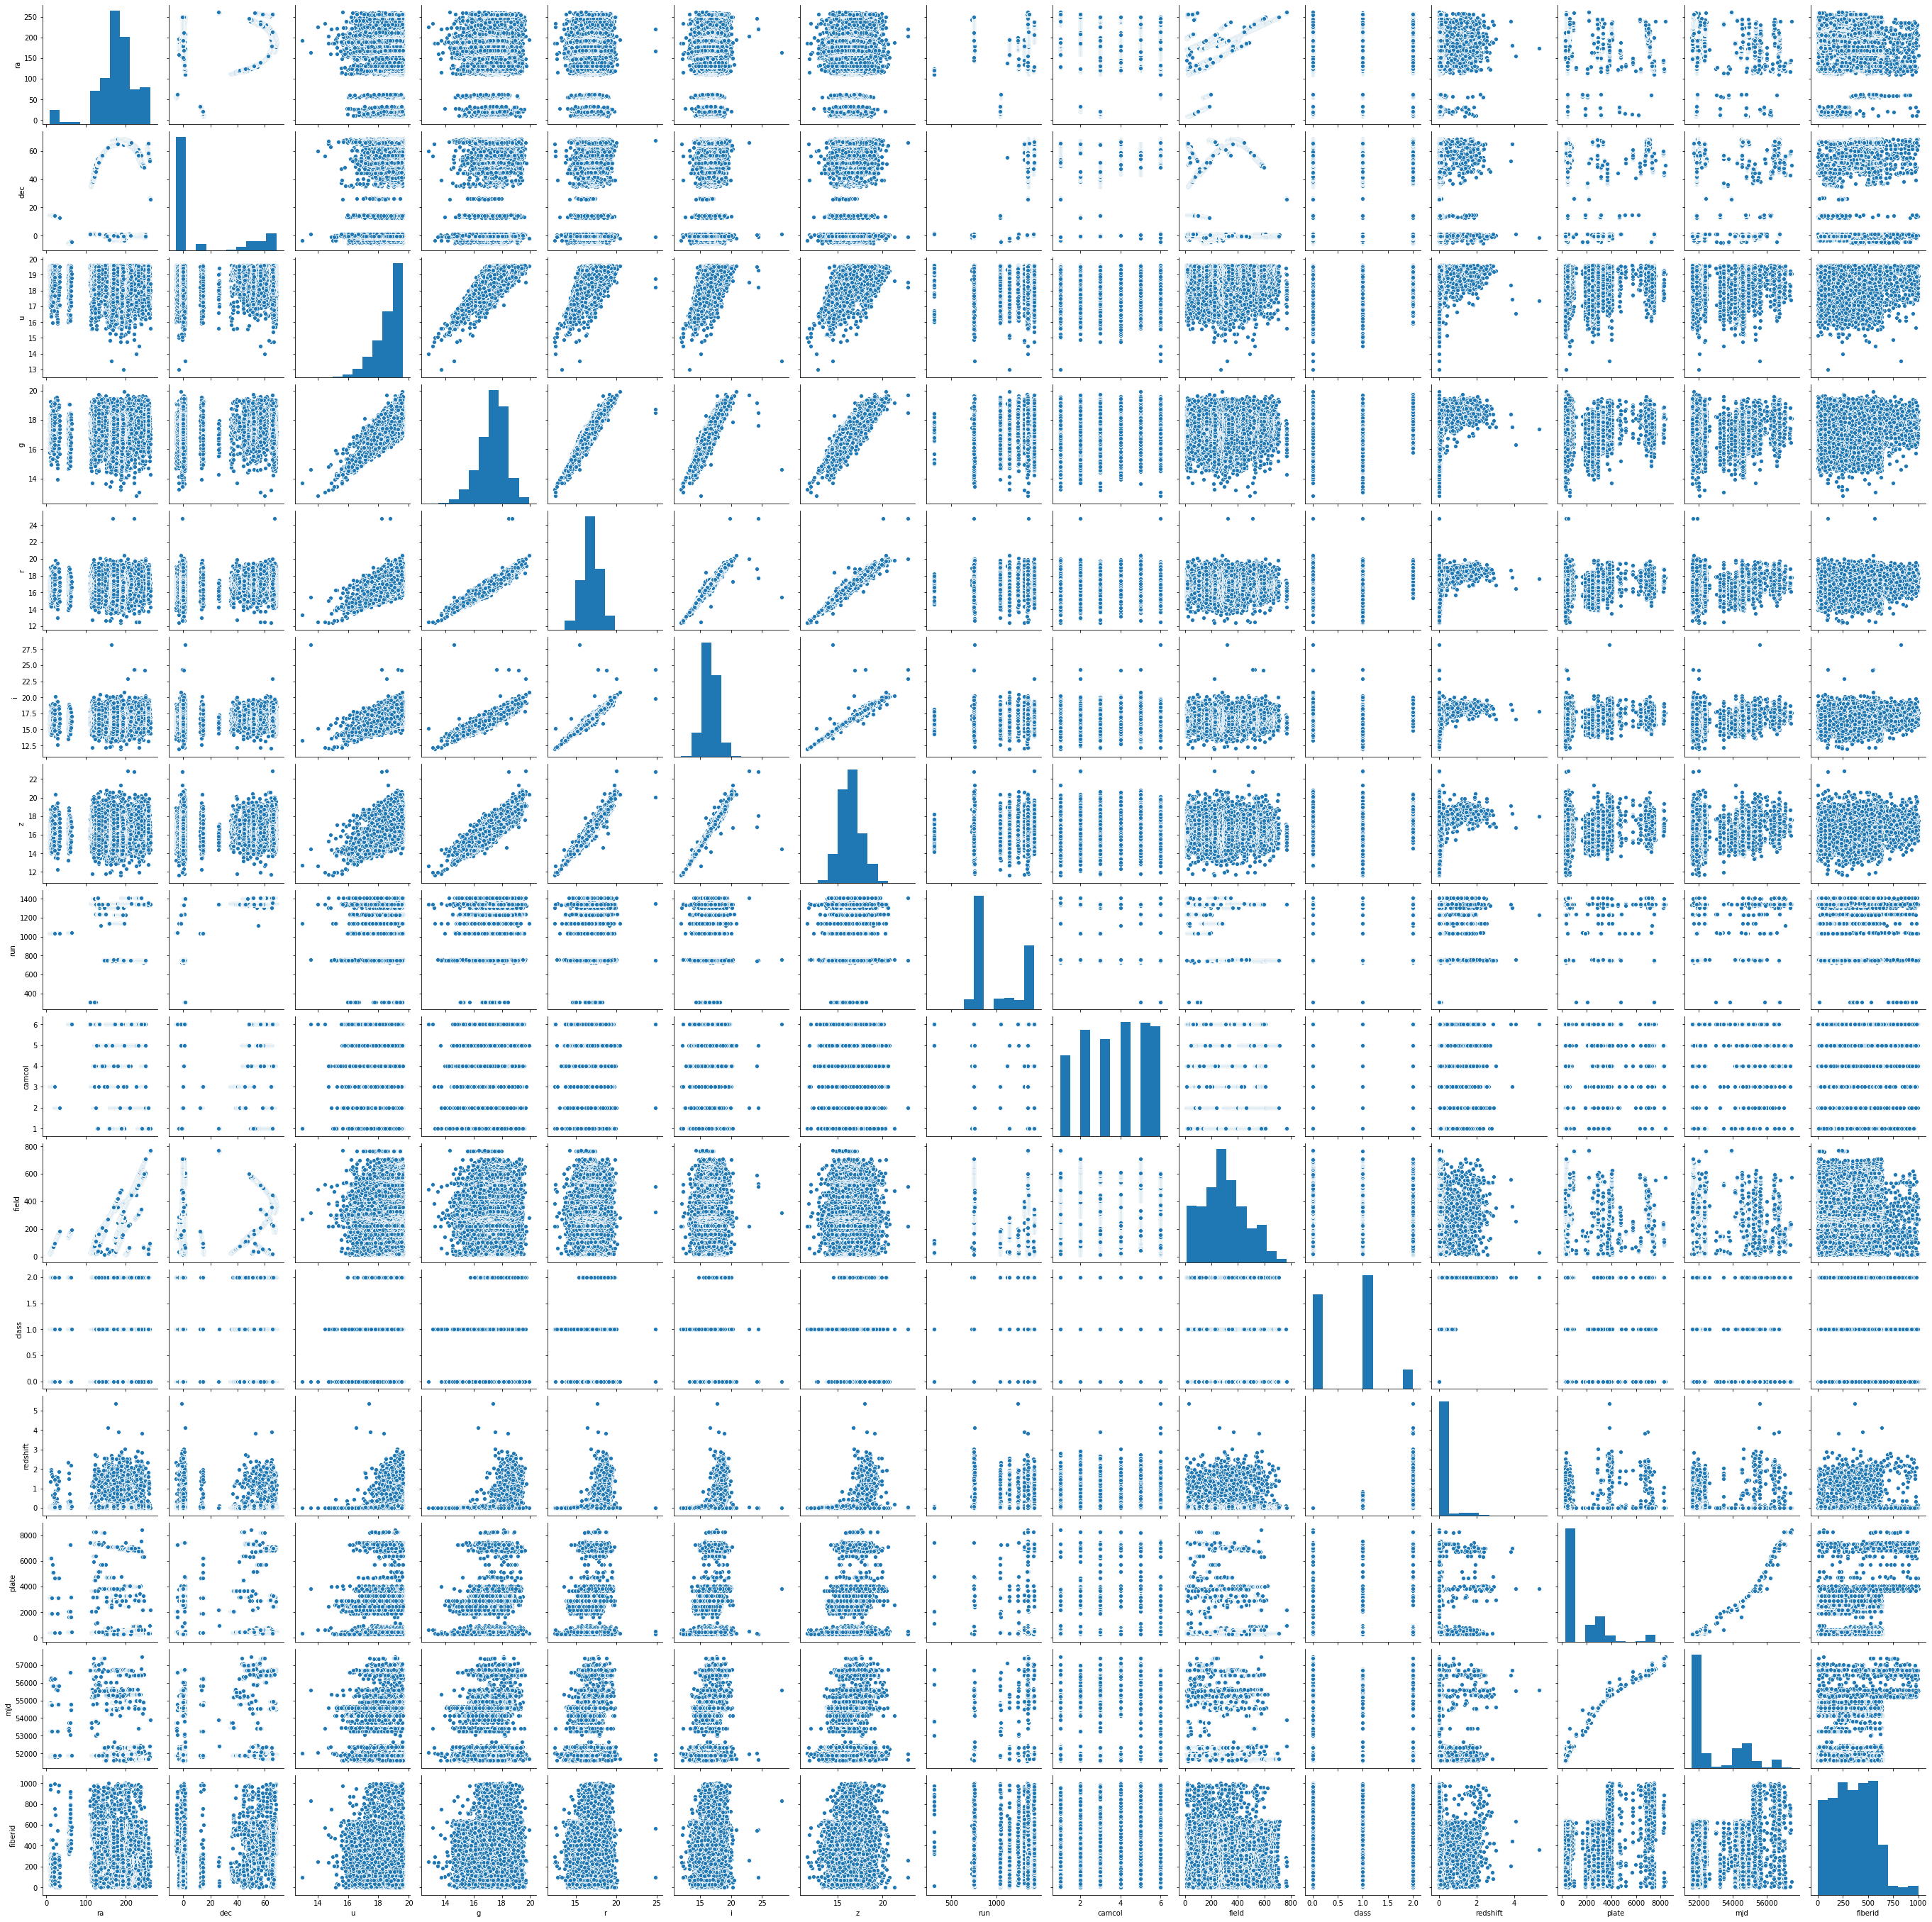

In [40]:
sns.pairplot(df)

## Multivariate analysis

<Figure size 576x288 with 0 Axes>

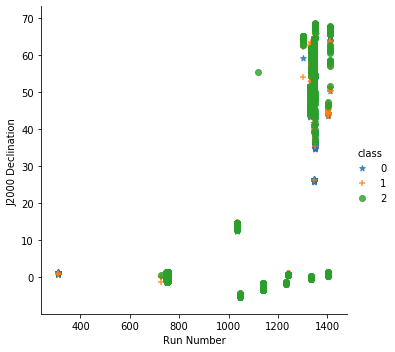

In [41]:
# Scatter plot between Run number and Declination
plt.figure(figsize=(8,4))
sns.lmplot(x='run',y='dec',fit_reg=False,data=df,hue='class',markers=['*','+','o'])
plt.xlabel('Run Number')
plt.ylabel('J2000 Declination ')
plt.show()

<Figure size 576x288 with 0 Axes>

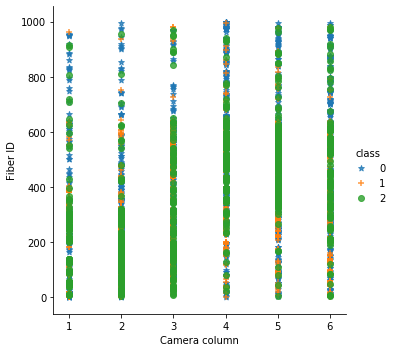

In [42]:
# Scatter plot between Camera column and Fiber ID
plt.figure(figsize=(8,4))
sns.lmplot(x='camcol',y='fiberid',fit_reg=False,data=df,hue='class',markers=['*','+','o'])
plt.xlabel('Camera column')
plt.ylabel('Fiber ID')
plt.show()

<Figure size 576x288 with 0 Axes>

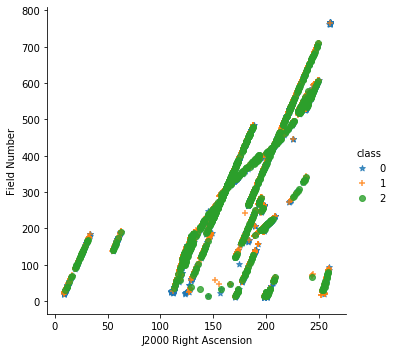

In [43]:
# Scatter plot between Field number and Right Ascension
plt.figure(figsize=(8,4))
sns.lmplot(x='ra',y='field',fit_reg=False,data=df,hue='class',markers=['*','+','o'])
plt.xlabel('J2000 Right Ascension')
plt.ylabel('Field Number')
plt.show()

From the above plots we can see that the most frequent class is QSO

## Checking Skewness

In [44]:
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.381391
redshift    4.265729
plate       1.794609
mjd         1.039610
fiberid     0.308053
dtype: float64

In [45]:
# Treating skewness via log method
columns = ['redshift','plate','mjd']
for col in columns:
    df[col]=np.log(df[col]+1)

In [46]:
df.isnull().sum()

ra          0
dec         0
u           0
g           0
r           0
i           0
z           0
run         0
camcol      0
field       0
class       0
redshift    0
plate       0
mjd         0
fiberid     0
dtype: int64

In [47]:
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.381391
redshift    3.513844
plate       0.696680
mjd         1.011097
fiberid     0.308053
dtype: float64

## Plotting Outliers

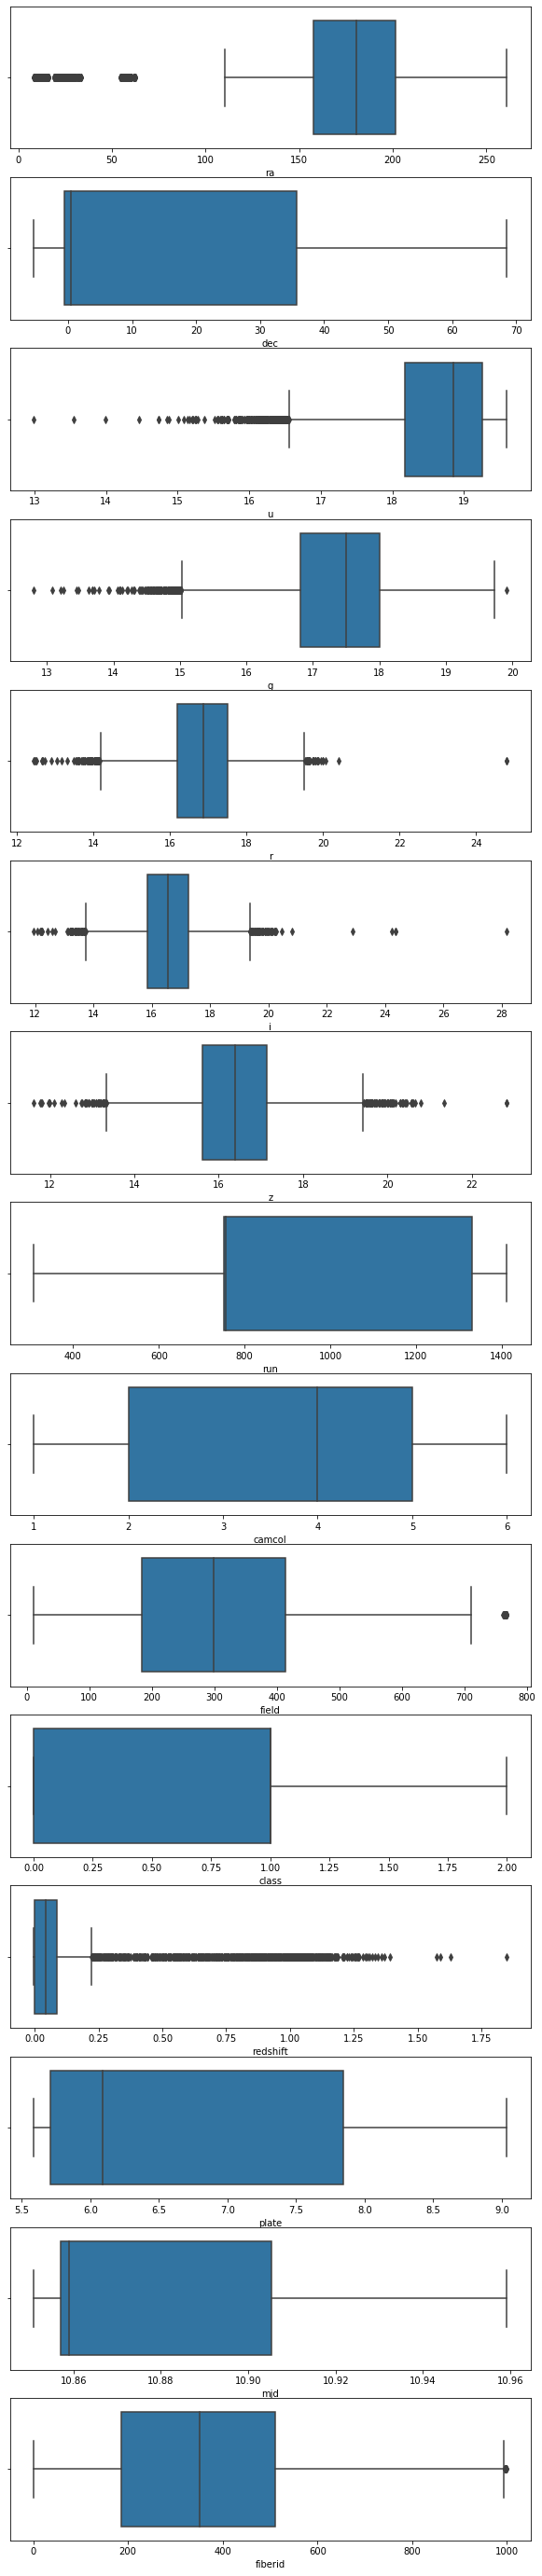

In [48]:
columns = df.columns
fig, axes = plt.subplots(15, figsize=(10,50))
for i, axi in enumerate(axes.flat):
    sns.boxplot(df[columns[i]], orient='h', ax=axi) 

Columns ra, u, g, r, i, z, field, fiberid and redshift have outliers

## Treating Outliers

In [49]:
column_out = ['ra','u','g','r','i','z','field','fiberid','redshift']
for col in column_out:
    q1 = df[col].quantile(0.10)
    q2 = df[col].quantile(0.90)
    print('For ',col,': ',q1,'\t',q2)
    df[col]=np.where(df[col]<q1,q1,df[col])
    df[col]=np.where(df[col]>q2,q2,df[col])
    print(df[col].skew())
    print('\n\n')

For  ra :  126.15468836000001 	 235.38210005000002
0.07311408517591843



For  u :  17.410641 	 19.468175999999996
-0.6111183369022682



For  g :  16.091143 	 18.425304
-0.3358760339444022



For  r :  15.466748999999998 	 18.179294999999996
-0.060468505761205056



For  i :  15.164273999999999 	 18.073096000000003
0.0697840823092262



For  z :  14.939181 	 18.02813
0.12314146522170286



For  field :  76.0 	 540.0
0.12970919389418503



For  fiberid :  78.0 	 606.0
-0.048070250237643976



For  redshift :  -0.0001374442450342535 	 0.1408327948654909
0.5015139197845837





In [50]:
df

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.468176,17.04240,15.94699,15.50342,15.22531,752,4,267.0,0,-0.000009,8.103797,10.913687,491.0
1,183.598371,0.135285,18.662800,17.21449,16.67637,16.48922,16.39150,752,4,267.0,0,-0.000055,5.780744,10.851587,541.0
2,183.680207,0.126185,19.382980,18.19169,17.47428,17.08732,16.80125,752,4,268.0,1,0.116103,5.662960,10.859460,513.0
3,183.870529,0.049911,17.765360,16.60272,16.16116,15.98233,15.90438,752,4,269.0,0,-0.000111,8.103797,10.913687,510.0
4,183.883288,0.102557,17.550250,16.26342,16.43869,16.55492,16.61326,752,4,269.0,0,0.000590,8.103797,10.913687,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.817770,17.47053,16.91508,16.68305,16.50570,1345,3,161.0,1,0.027209,6.104793,10.856650,246.0
9996,131.306083,51.671341,18.272550,17.43849,17.07692,16.71661,16.69897,1345,3,162.0,1,0.111338,6.104793,10.856650,228.0
9997,131.552562,51.666986,18.758180,17.77784,17.51872,17.43302,17.42048,1345,3,162.0,0,-0.000137,8.896177,10.951052,606.0
9998,131.477151,51.753068,18.882870,17.91068,17.53152,17.36284,17.13988,1345,3,163.0,1,0.013922,6.104793,10.856650,229.0


EDA process is over

# Model Training

In [51]:
# seprating the dataset into input and output variables
x = df.drop(columns=['class'],axis=1)
y = df['class']
x.head(10)

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.468176,17.042400,15.94699,15.50342,15.22531,752,4,267.0,-0.000009,8.103797,10.913687,491.0
1,183.598371,0.135285,18.662800,17.214490,16.67637,16.48922,16.39150,752,4,267.0,-0.000055,5.780744,10.851587,541.0
2,183.680207,0.126185,19.382980,18.191690,17.47428,17.08732,16.80125,752,4,268.0,0.116103,5.662960,10.859460,513.0
3,183.870529,0.049911,17.765360,16.602720,16.16116,15.98233,15.90438,752,4,269.0,-0.000111,8.103797,10.913687,510.0
4,183.883288,0.102557,17.550250,16.263420,16.43869,16.55492,16.61326,752,4,269.0,0.000590,8.103797,10.913687,512.0
5,183.847174,0.173694,19.431330,18.425304,18.16451,18.01475,18.02813,752,4,269.0,0.000315,5.783825,10.852575,594.0
6,183.864379,0.019201,19.383220,17.889950,17.10537,16.66393,16.36955,752,4,269.0,0.095530,5.662960,10.859460,559.0
7,183.900081,0.187473,18.979930,17.844960,17.38022,17.20673,17.07071,752,4,269.0,0.000315,8.103797,10.913687,515.0
8,183.924588,0.097246,17.906160,16.971720,16.67541,16.53776,16.47596,752,4,270.0,0.000089,5.780744,10.851587,595.0
9,183.973498,0.081626,18.672490,17.713750,17.49362,17.28284,17.22644,752,4,270.0,0.039709,5.666427,10.859018,400.0


In [52]:
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    1
7    0
8    0
9    1
Name: class, dtype: int64

In [53]:
# scaling the input variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)

In [54]:
# Dividing input and target variables into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [55]:
print(x_train.shape,'\t',y_train.shape)

(8000, 14) 	 (8000,)


In [56]:
# Importing our model Library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score

# Importing Evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding the best parameters

In [57]:
# Using GridSearchCV to find out the best parameter in LogisticRegression
parameters={'C':[0.001 ,0.01, 0.1, 1, 10],
           'random_state':range(42,100)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [58]:
# Using GridSearchCV to find best parameters in KNeighboursClassifier
parameters={'n_neighbors':range(5,25)}
knn = KNeighborsClassifier()
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 6}


In [59]:
# Using RandomizedSearchCV to find best parameters in SVC
from sklearn.model_selection import RandomizedSearchCV
svc = SVC()
parameters={'kernel':['rbf','poly','linear','sigmoid'],
           'C' : [1,5,10],
           'degree' : [3,8],
           'gamma' : ('auto','scale')}
clf = RandomizedSearchCV(estimator=svc,
                           param_distributions=parameters,
                           n_iter = 100, 
                           cv = 5, verbose=2, 
                           n_jobs = -1,
                           random_state=42)
clf.fit(x,y)
clf.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.6min finished


{'kernel': 'linear', 'gamma': 'auto', 'degree': 3, 'C': 10}

In [60]:
# Using GridSearchCV to find best parameters in DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],
             'max_depth': range(3, 15)}
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


In [61]:
# Models with its best parameters
LR = LogisticRegression(C=10,random_state=42)
KNN = KNeighborsClassifier(n_neighbors= 6)
SVC = SVC(kernel='linear',gamma='auto',degree=3,C=10)
DTC = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [62]:
# Using algorithms via for loop
model=[LR,GaussianNB(),DTC,SVC,KNN]
for m in model:
    m.fit(x_train,y_train)
    print('Score of ',m,' is: ',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print('Accuracy score : ',accuracy_score(y_test,pred))
    print('Confusion matrix : \n',confusion_matrix(y_test,pred))
    print('Classification report : \n',classification_report(y_test,pred))
    print('*********************************************************************')
    print('\n\n')

Score of  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)  is:  0.986625
Accuracy score :  0.9865
Confusion matrix : 
 [[814   0   0]
 [ 11 975  10]
 [  0   6 184]]
Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       814
           1       0.99      0.98      0.99       996
           2       0.95      0.97      0.96       190

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000

*********************************************************************



Score of  GaussianNB(priors=None, var_smoothing=1e-09)  is:  0.971875
Accuracy s

In [63]:
# cross validate the models
models = [LR,GaussianNB(),DTC,SVC,KNN]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score : ',score)
    print('Mean score : ',score.mean())
    print('Standard deviation : ',score.std())
    print('**************************************************************')
    print('\n\n')

Model :  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score :  [0.993 0.982 0.984 0.991 0.99  0.989 0.979 0.983 0.991 0.983]
Mean score :  0.9865
Standard deviation :  0.004566180022732354
**************************************************************



Model :  GaussianNB(priors=None, var_smoothing=1e-09)
Score :  [0.982 0.97  0.983 0.972 0.967 0.983 0.968 0.969 0.968 0.964]
Mean score :  0.9726000000000001
Standard deviation :  0.006873136110975839
**************************************************************



Model :  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_d

## Using Ensemble Techniques

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
# Using algorithms via for loop
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of ',m,' is: ',m.score(x_train,y_train))
    pred=m.predict(x_test)
    print('Accuracy score : ',accuracy_score(y_test,pred))
    print('Confusion matrix : \n',confusion_matrix(y_test,pred))
    print('Classification report : \n',classification_report(y_test,pred))
    print('*********************************************************************')
    print('\n\n')

Score of  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  is:  1.0
Accuracy score :  0.9895
Confusion matrix : 
 [[813   1   0]
 [  6 986   4]
 [  0  10 180]]
Classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       814
           1       0.99      0.99      0.99       996
           2       0.98      0.95      0.96       190

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98

In [66]:
# cross validate the models
models=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in models:
    score=cross_val_score(m,x,y,cv=10,scoring='accuracy')
    print('Model : ',m)
    print('Score : ',score)
    print('Mean score : ',score.mean())
    print('Standard deviation : ',score.std())
    print('**************************************************************')
    print('\n\n')

Model :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score :  [0.99  0.986 0.988 0.991 0.99  0.991 0.981 0.985 0.99  0.986]
Mean score :  0.9878
Standard deviation :  0.003091924966748064
**************************************************************



Model :  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Score :  [0.897 0.912 0.884 0.885 0.878 0.896 0.819 0.963 0.898 0.882]
Mean score :  0.8914
Standar

DecisionTreeClassifier gives the best score for this dataset

In [67]:
# DecisionTreeClassifier with best parameters
dt_class = DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_class.fit(x_train,y_train)
dt_class.score(x_train,y_train)
preddtc = dt_class.predict(x_test)
print('Accuracy score : ',accuracy_score(y_test,preddtc))
print('Confusion matrix : \n',confusion_matrix(y_test,preddtc))
print('Classification report : \n',classification_report(y_test,preddtc))

Accuracy score :  0.9935
Confusion matrix : 
 [[814   0   0]
 [  1 990   5]
 [  0   7 183]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       814
           1       0.99      0.99      0.99       996
           2       0.97      0.96      0.97       190

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



## Saving Predictions to a CSV file

In [69]:
preddtc = pd.DataFrame(preddtc)
preddtc = preddtc.rename(columns={0: 'class'})
preddtc

,class
0,1
1,2
2,1
3,1
4,0
...,...
1995,1
1996,1
1997,0
1998,0


In [70]:
preddtc.to_csv(r'Space_Server.csv',index=False)

# Saving Model

In [68]:
from sklearn.externals import joblib
joblib.dump(dt_class,'Space_Server.pkl')

['Space_Server.pkl']